___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [5]:
df.duplicated().sum()

0

In [6]:
dropped_columns = ["RowNumber","CustomerId","Surname"]
df.drop(columns=dropped_columns,inplace=True)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.shape

(10000, 11)

In [9]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
df["Geography"].replace({"France" : 0, "Spain" : 1, "Germany" : 2}, inplace=True)
df["Gender"].replace({"Male" : 0, "Female" : 1}, inplace=True)

In [11]:
df["Geography"].unique()

array([0, 1, 2], dtype=int64)

In [12]:
# Target column
# df["Exited"].replace({0 : "stay", 1 : "left"}, inplace=True)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Geography,10000.0,0.749500,0.830433,0.00,0.00,0.000,2.0000,2.00
Gender,10000.0,0.454300,0.497932,0.00,0.00,0.000,1.0000,1.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


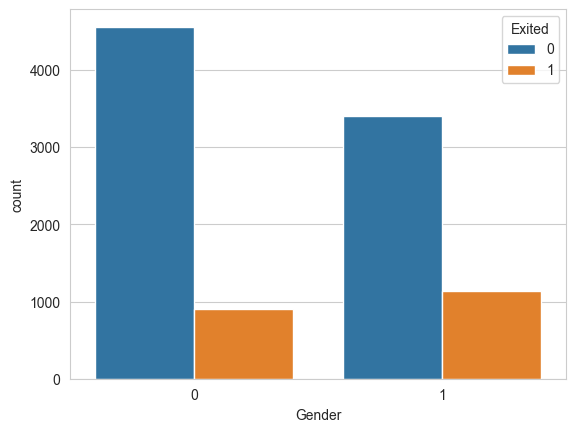

In [14]:
sns.countplot(x="Gender", hue="Exited", data=df)
plt.show()

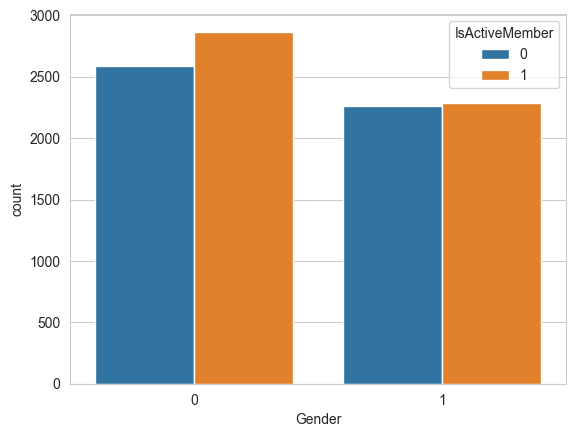

In [15]:
sns.countplot(x="Gender", hue="IsActiveMember", data=df)
plt.show()
# Only have of the bank users are active

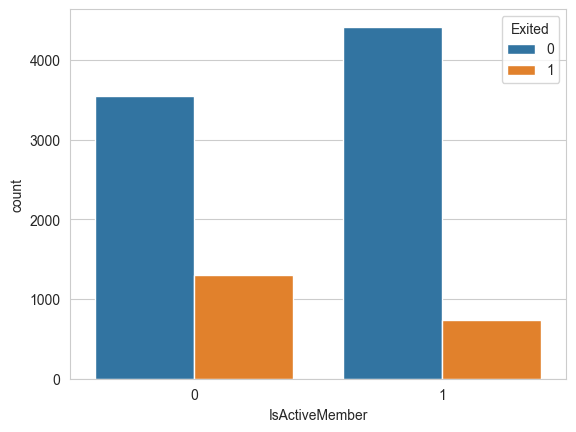

In [16]:
sns.countplot(x="IsActiveMember", hue="Exited", data=df)
plt.show()
# We can see that those who are not active has a high chance to leave the bank

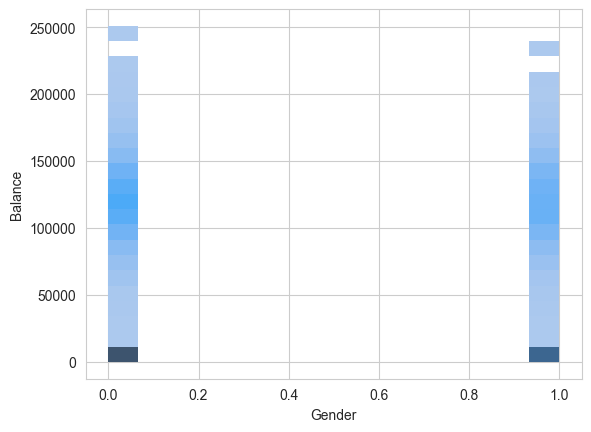

In [17]:
sns.histplot(x="Gender", y="Balance", data=df)
plt.show()

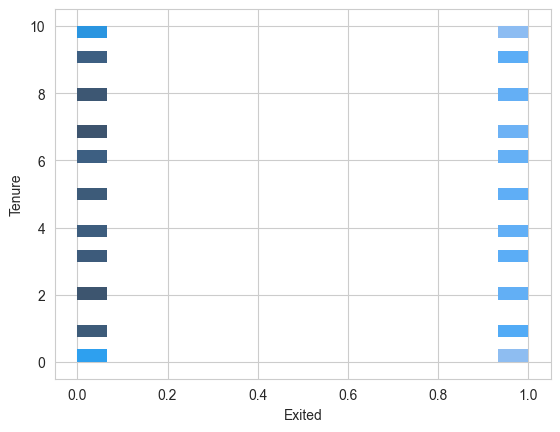

In [18]:
sns.histplot(x="Exited", y="Tenure", data=df)
plt.show()

<Axes: xlabel='IsActiveMember', ylabel='Count'>

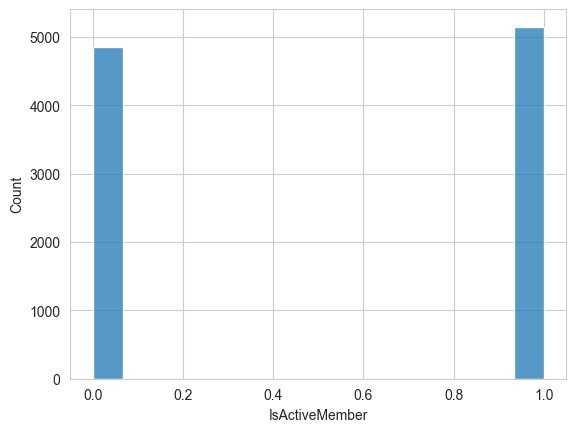

In [19]:
sns.histplot(x="IsActiveMember", data=df)

<Axes: xlabel='IsActiveMember', ylabel='Age'>

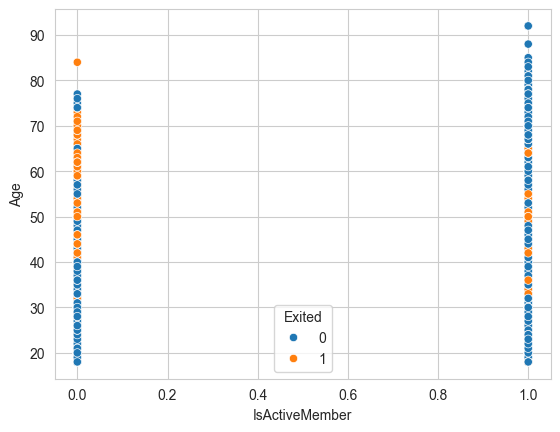

In [20]:
sns.scatterplot(x="IsActiveMember", y="Age", hue="Exited", data=df)

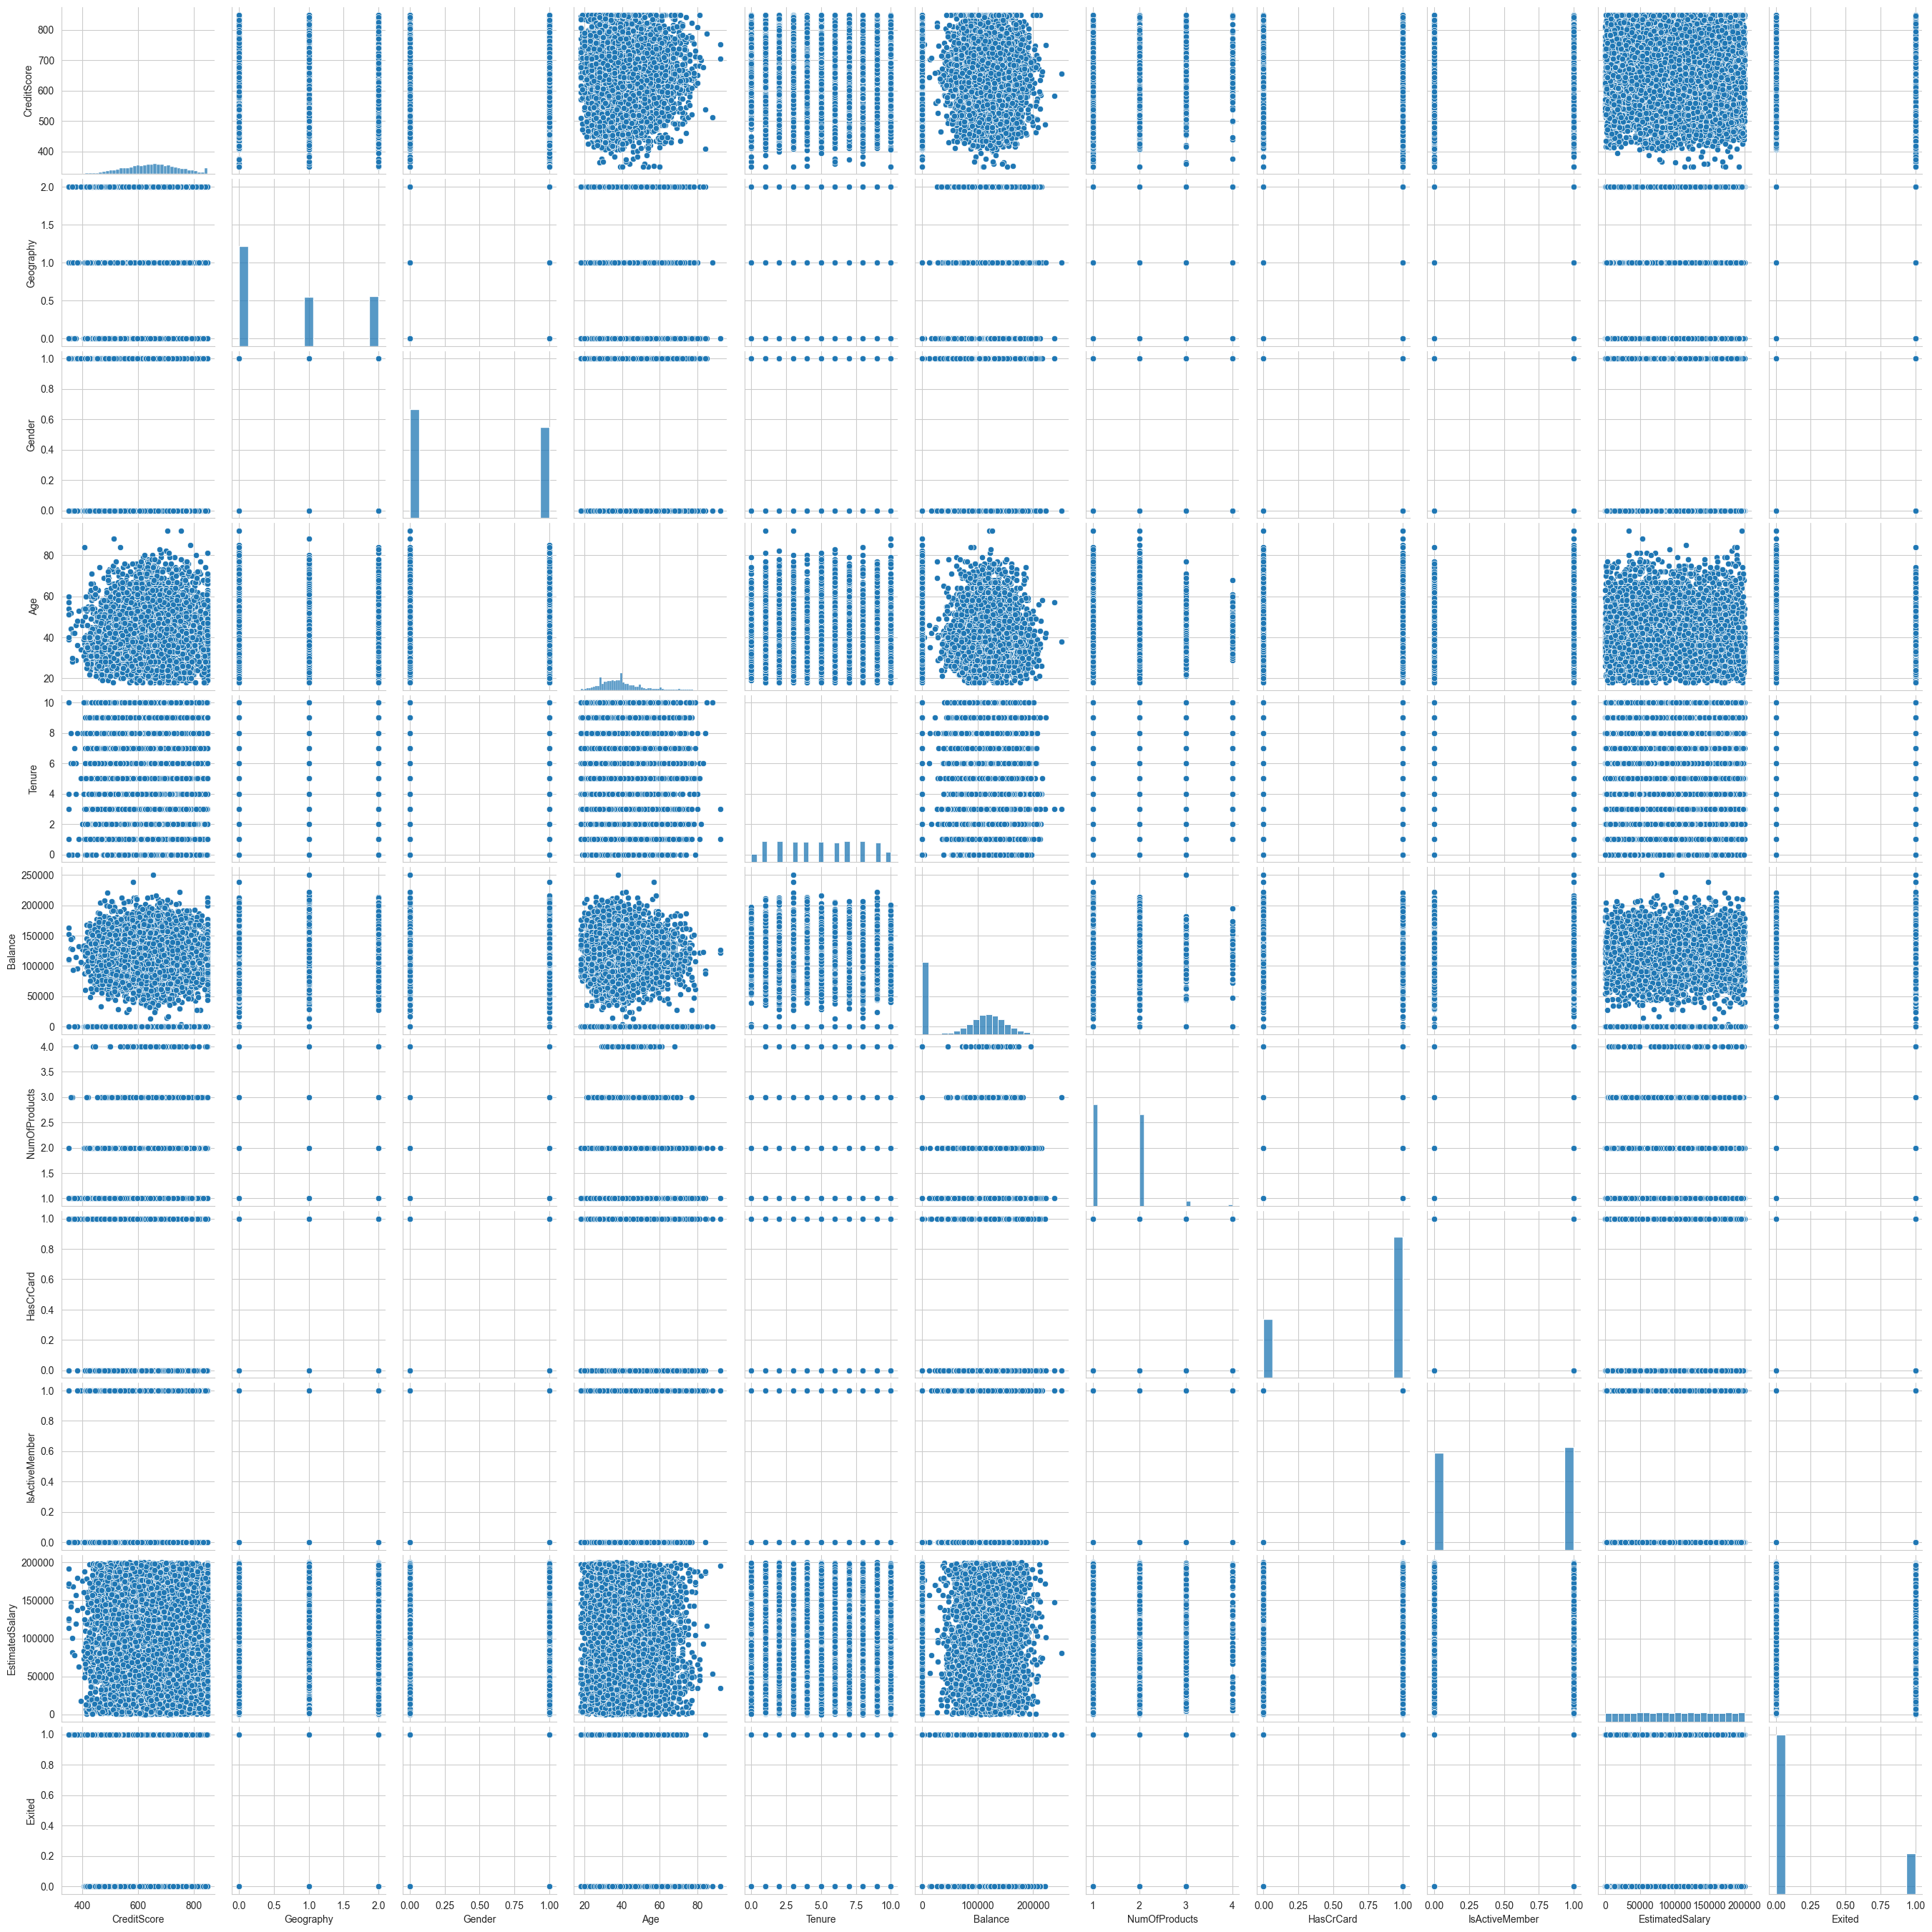

In [21]:
sns.pairplot(df)

<Axes: >

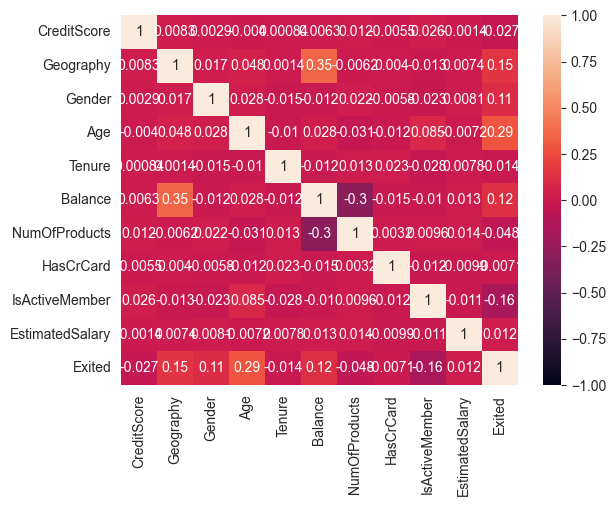

In [22]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

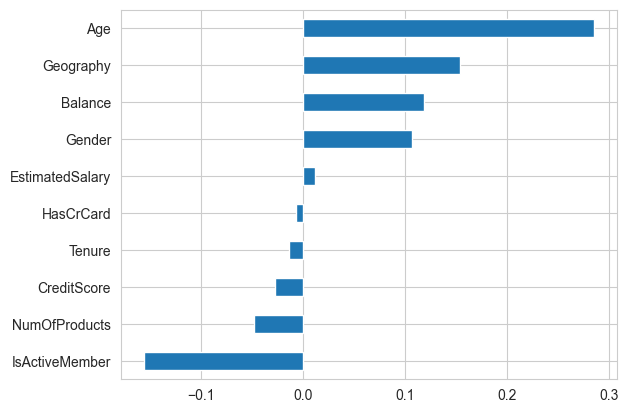

In [23]:
(df.corr(numeric_only=True)["Exited"].sort_values().drop("Exited").plot(kind="barh"))
plt.show()

<Axes: xlabel='Exited', ylabel='Age'>

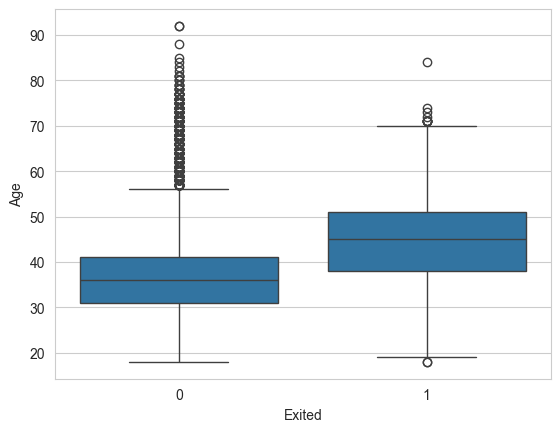

In [24]:
sns.boxplot(x="Exited", y="Age", data=df)

# Preprocessing of Data
- Train | Test Split, Scalling

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [26]:
X = df.drop("Exited", axis=1)
y = df.Exited

In [27]:
seed = 101

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [29]:
scaler = RobustScaler()

In [30]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [33]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
def eval_metric(actual, pred):
    """Prints regression metrics, calculated using the given
    actual and predicted target values.
    Args:
        actual (list): Actual target values.
        pred (list): Predicted target values.
    Returns:
        None
    """
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [36]:
X_train.shape

(8000, 10)

In [37]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(10, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="binary_crossentropy")

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(x=X_train, y=y_train, validation_split=0.10, batch_size=32, epochs= 500)

Epoch 1/500
  1/225 [..............................] - ETA: 0s - loss: 0.2417

225/225 [==============================] - 0s 1ms/step - loss: 0.3267 - val_loss: 0.3461
Epoch 2/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3285 - val_loss: 0.3590
Epoch 3/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3272 - val_loss: 0.3491
Epoch 4/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3313 - val_loss: 0.3627
Epoch 5/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3258 - val_loss: 0.3499
Epoch 6/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3250 - val_loss: 0.3618
Epoch 7/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3243 - val_loss: 0.3640
Epoch 8/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3264 - val_loss: 0.3637
Epoch 9/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3257 - val_loss: 0.3776
Epoch 10/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3241 - val_loss: 0.3525
E

In [44]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(10, 10) dtype=float32, numpy=
 array([[-0.15573475, -0.02333605, -0.2764312 , -0.05564022, -0.08249516,
          0.11836261,  0.16244388,  0.16304392, -0.04600371,  0.06619621],
        [ 0.29053587,  0.37179232,  0.33761734, -0.01904561, -0.11842863,
         -0.39339888,  0.69814444, -0.1306205 ,  0.12348019, -0.48007986],
        [ 0.14819095,  0.31161833,  0.881382  , -0.65250313,  0.13007374,
         -0.28768083, -0.02674342,  0.5997044 , -1.3529786 ,  0.2980311 ],
        [ 0.7156032 ,  0.50802106,  0.11886322,  0.4063635 ,  0.6591162 ,
          0.5940904 ,  0.22420596,  0.03751811, -0.6393447 ,  0.265369  ],
        [ 0.05838374, -0.31957245, -0.10402863,  0.32997477,  0.02650218,
          0.12362505, -0.06442229,  0.6045934 ,  0.11214381, -0.06135363],
        [-0.6155953 , -0.37666267,  0.78231555, -0.91290075,  0.4483446 ,
          0.82424384, -0.40267143,  0.12281611,  0.76397187, -0.8740203 ],
        [-0.73340684, -0.06081424, -0.

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [45]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,0.326658,0.346129
1,0.328547,0.359039
2,0.327193,0.349078
3,0.331344,0.362668
4,0.325829,0.349891
...,...,...
495,0.317661,0.413492
496,0.320788,0.441979
497,0.316910,0.420868
498,0.319359,0.439704


<Axes: >

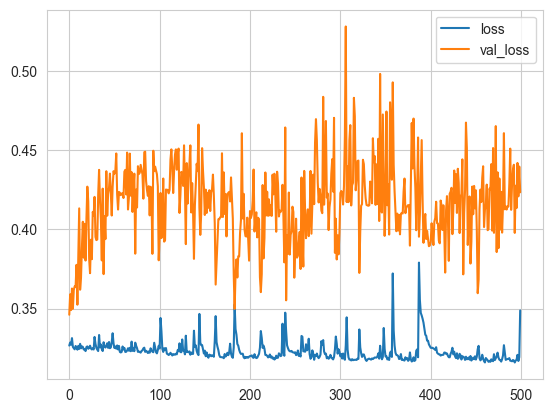

In [46]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [56]:
model.evaluate(X_test, y_test, verbose=0)

0.390472948551178

In [59]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1528   49]
 [ 221  202]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1577
           1       0.80      0.48      0.60       423

    accuracy                           0.86      2000
   macro avg       0.84      0.72      0.76      2000
weighted avg       0.86      0.86      0.85      2000



In [61]:
eval_metric(y_test, y_pred)

r2_score: 0.1904909672283761 
mae: 0.135 
mse: 0.135 
rmse: 0.3674234614174767


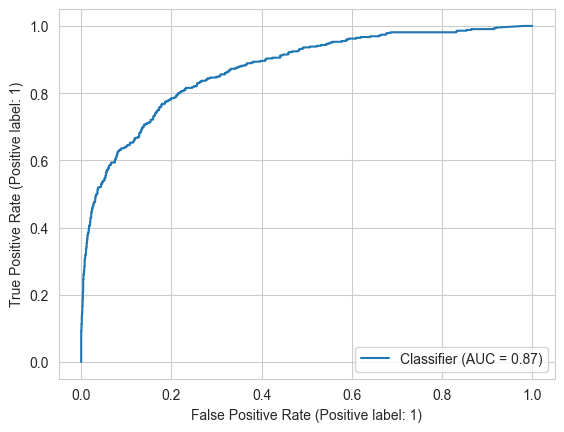

In [50]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [62]:
roc_auc_score(y_test, y_pred_proba)

0.8717917582985919

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [64]:
from tensorflow.python.keras.optimizers import adam_v2

In [65]:
Adam = adam_v2.Adam

In [66]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(10, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1))

opt = Adam(learning_rate=0.004)

model.compile(optimizer=opt, loss="binary_crossentropy")

In [67]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(10, 10) dtype=float32, numpy=
 array([[-0.02900523, -0.2581288 , -0.5333776 , -0.2883826 , -0.00395799,
          0.3118413 ,  0.5314697 ,  0.22550315, -0.13235852, -0.30662328],
        [ 0.23413819,  0.4166062 ,  0.39432448, -0.11290246, -0.04675663,
         -0.23103547,  0.44548255,  0.14000952,  0.09515816, -0.42761967],
        [-0.10096979,  0.37843335,  0.5082911 , -0.34519547, -0.12662119,
          0.07269073,  0.26210767,  0.42742473, -0.52004147,  0.11374778],
        [ 0.46159124,  0.06548572,  0.16812104,  0.07291311,  0.54015875,
          0.3047632 , -0.3471834 ,  0.04718393, -0.5398611 ,  0.26066452],
        [-0.5008461 , -0.1365816 , -0.14551923,  0.44380897,  0.14006919,
          0.5246999 , -0.28011551,  0.3483113 ,  0.34652436, -0.05512297],
        [-0.26427788, -0.29941642, -0.03858018, -0.42950118,  0.07606131,
          0.01565778, -0.09309486,  0.07280868,  0.02586305, -0.38569474],
        [-0.4409862 , -0.1049608 , -

In [69]:
model.fit(x=X_train,y=y_train, validation_split=0.10, batch_size=36, epochs=500)

Epoch 1/500
200/200 [==============================] - 0s 1ms/step - loss: 0.3587 - val_loss: 0.3328
Epoch 2/500
200/200 [==============================] - 0s 1ms/step - loss: 0.3546 - val_loss: 0.3311
Epoch 3/500
200/200 [==============================] - 0s 1ms/step - loss: 0.3537 - val_loss: 0.3296
Epoch 4/500
200/200 [==============================] - 0s 1ms/step - loss: 0.3545 - val_loss: 0.3289
Epoch 5/500
200/200 [==============================] - 0s 1ms/step - loss: 0.3516 - val_loss: 0.3284
Epoch 6/500
200/200 [==============================] - 0s 1ms/step - loss: 0.3493 - val_loss: 0.3264
Epoch 7/500
200/200 [==============================] - 0s 1ms/step - loss: 0.3537 - val_loss: 0.3279
Epoch 8/500
200/200 [==============================] - 0s 1ms/step - loss: 0.3510 - val_loss: 0.3373
Epoch 9/500
200/200 [==============================] - 0s 1ms/step - loss: 0.3580 - val_loss: 0.3251
Epoch 10/500
200/200 [==============================] - 0s 1ms/step - loss: 0.3528 - val_lo

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<Axes: >

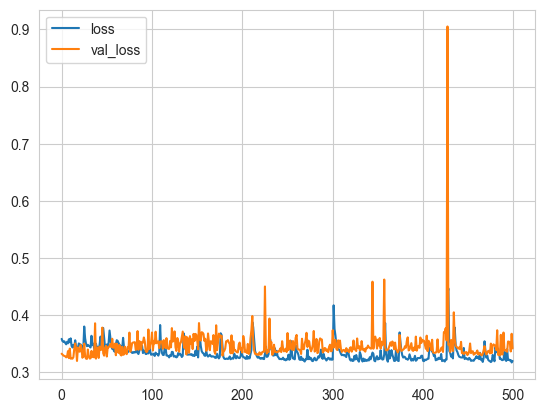

In [70]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [71]:
model.evaluate(X_test, y_test, verbose=0)

0.3561790883541107

In [72]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1507   70]
 [ 205  218]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1577
           1       0.76      0.52      0.61       423

    accuracy                           0.86      2000
   macro avg       0.82      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [73]:
eval_metric(y_test, y_pred)

r2_score: 0.17550005921408685 
mae: 0.1375 
mse: 0.1375 
rmse: 0.37080992435478316


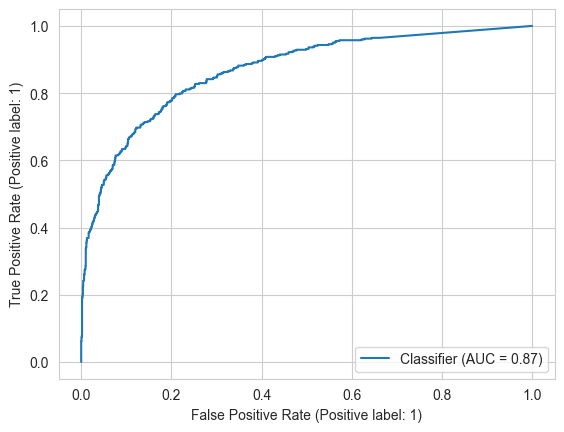

In [74]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [75]:
roc_auc_score(y_test, y_pred_proba)

0.8686534117058003

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [76]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(10, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1))

opt = adam_v2.Adam(learning_rate = 0.007)

model.compile(optimizer=opt, loss="binary_crossentropy")

In [77]:
model.weights

[<tf.Variable 'dense_8/kernel:0' shape=(10, 10) dtype=float32, numpy=
 array([[-0.02900523, -0.2581288 , -0.5333776 , -0.2883826 , -0.00395799,
          0.3118413 ,  0.5314697 ,  0.22550315, -0.13235852, -0.30662328],
        [ 0.23413819,  0.4166062 ,  0.39432448, -0.11290246, -0.04675663,
         -0.23103547,  0.44548255,  0.14000952,  0.09515816, -0.42761967],
        [-0.10096979,  0.37843335,  0.5082911 , -0.34519547, -0.12662119,
          0.07269073,  0.26210767,  0.42742473, -0.52004147,  0.11374778],
        [ 0.46159124,  0.06548572,  0.16812104,  0.07291311,  0.54015875,
          0.3047632 , -0.3471834 ,  0.04718393, -0.5398611 ,  0.26066452],
        [-0.5008461 , -0.1365816 , -0.14551923,  0.44380897,  0.14006919,
          0.5246999 , -0.28011551,  0.3483113 ,  0.34652436, -0.05512297],
        [-0.26427788, -0.29941642, -0.03858018, -0.42950118,  0.07606131,
          0.01565778, -0.09309486,  0.07280868,  0.02586305, -0.38569474],
        [-0.4409862 , -0.1049608 , -

In [79]:
model.fit(x=X_train, y=y_train, validation_split=0.10, batch_size=36, epochs=500)

Epoch 1/500
 59/200 [=======>......................] - ETA: 0s - loss: 3.2026

200/200 [==============================] - 0s 1ms/step - loss: 3.1621 - val_loss: 2.6608
Epoch 2/500
200/200 [==============================] - 0s 1ms/step - loss: 3.1621 - val_loss: 2.6608
Epoch 3/500
200/200 [==============================] - 0s 2ms/step - loss: 3.1621 - val_loss: 2.6608
Epoch 4/500
200/200 [==============================] - 0s 2ms/step - loss: 3.1621 - val_loss: 2.6608
Epoch 5/500
200/200 [==============================] - 0s 2ms/step - loss: 3.1621 - val_loss: 2.6608
Epoch 6/500
200/200 [==============================] - 0s 2ms/step - loss: 3.1621 - val_loss: 2.6608
Epoch 7/500
200/200 [==============================] - 0s 1ms/step - loss: 3.1621 - val_loss: 2.6608
Epoch 8/500
200/200 [==============================] - 0s 1ms/step - loss: 3.1621 - val_loss: 2.6608
Epoch 9/500
200/200 [==============================] - 0s 1ms/step - loss: 3.1621 - val_loss: 2.6608
Epoch 10/500
200/200 [==============================] - 0s 2ms/step - loss: 3.1621 - val_loss: 2.6608
E

<Axes: >

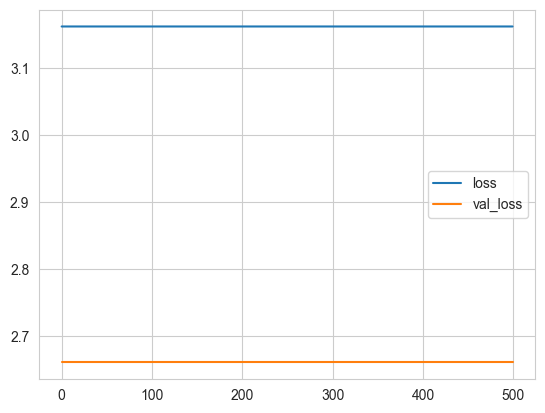

In [80]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [81]:
model.evaluate(X_test, y_test, verbose=0)

3.262376308441162

In [82]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1577    0]
 [ 423    0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1577
           1       0.00      0.00      0.00       423

    accuracy                           0.79      2000
   macro avg       0.39      0.50      0.44      2000
weighted avg       0.62      0.79      0.70      2000



In [83]:
eval_metric(y_test, y_pred)

r2_score: -0.26823081800887727 
mae: 0.2115 
mse: 0.2115 
rmse: 0.45989129150267677


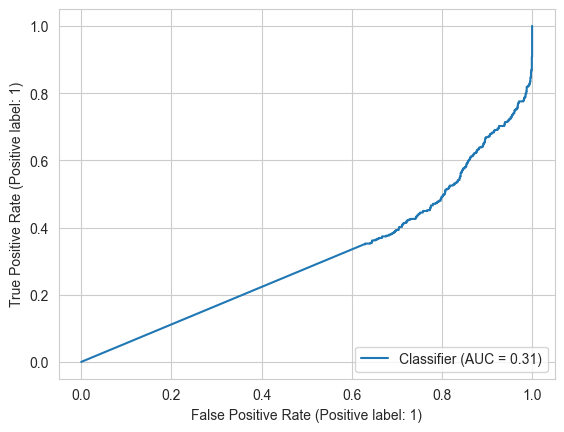

In [84]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [85]:
roc_auc_score(y_test, y_pred_proba)

0.3119053294177082

### Add Dropout Layer

In [86]:
from tensorflow.python.keras.layers import Dropout

In [87]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(10, activation="relu", input_dim=X_test.shape[1]))
model.add(Dropout(0.15))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.15))
model.add(Dense(4, activation="relu"))
model.add(Dropout(0.15))
model.add(Dense(1))

opt = adam_v2.Adam(learning_rate=0.007)

model.compile(optimizer=opt, loss="binary_crossentropy")

In [88]:
model.weights

[<tf.Variable 'dense_12/kernel:0' shape=(10, 10) dtype=float32, numpy=
 array([[-0.02900523, -0.2581288 , -0.5333776 , -0.2883826 , -0.00395799,
          0.3118413 ,  0.5314697 ,  0.22550315, -0.13235852, -0.30662328],
        [ 0.23413819,  0.4166062 ,  0.39432448, -0.11290246, -0.04675663,
         -0.23103547,  0.44548255,  0.14000952,  0.09515816, -0.42761967],
        [-0.10096979,  0.37843335,  0.5082911 , -0.34519547, -0.12662119,
          0.07269073,  0.26210767,  0.42742473, -0.52004147,  0.11374778],
        [ 0.46159124,  0.06548572,  0.16812104,  0.07291311,  0.54015875,
          0.3047632 , -0.3471834 ,  0.04718393, -0.5398611 ,  0.26066452],
        [-0.5008461 , -0.1365816 , -0.14551923,  0.44380897,  0.14006919,
          0.5246999 , -0.28011551,  0.3483113 ,  0.34652436, -0.05512297],
        [-0.26427788, -0.29941642, -0.03858018, -0.42950118,  0.07606131,
          0.01565778, -0.09309486,  0.07280868,  0.02586305, -0.38569474],
        [-0.4409862 , -0.1049608 , 

In [89]:
model.fit(x=X_train, y=y_train, validation_split=0.10, batch_size=36, epochs=500)

Epoch 1/500
200/200 [==============================] - 1s 2ms/step - loss: 0.6697 - val_loss: 0.4140
Epoch 2/500
200/200 [==============================] - 0s 1ms/step - loss: 0.4769 - val_loss: 0.4012
Epoch 3/500
200/200 [==============================] - 0s 1ms/step - loss: 0.4768 - val_loss: 0.4185
Epoch 4/500
200/200 [==============================] - 0s 1ms/step - loss: 0.4569 - val_loss: 0.3844
Epoch 5/500
200/200 [==============================] - 0s 1ms/step - loss: 0.4399 - val_loss: 0.3716
Epoch 6/500
200/200 [==============================] - 0s 1ms/step - loss: 0.4423 - val_loss: 0.3768
Epoch 7/500
200/200 [==============================] - 0s 1ms/step - loss: 0.4273 - val_loss: 0.3921
Epoch 8/500
200/200 [==============================] - 0s 1ms/step - loss: 0.4261 - val_loss: 0.3582
Epoch 9/500
200/200 [==============================] - 0s 1ms/step - loss: 0.4212 - val_loss: 0.3630
Epoch 10/500
200/200 [==============================] - 0s 1ms/step - loss: 0.4091 - val_lo

<Axes: >

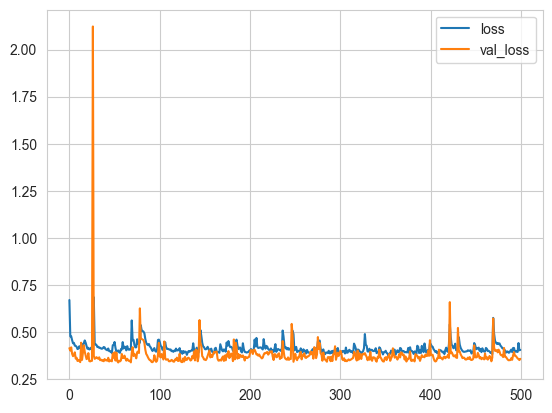

In [90]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [91]:
model.evaluate(X_test, y_test, verbose=0)

0.3780320882797241

In [92]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1571    6]
 [ 339   84]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1577
           1       0.93      0.20      0.33       423

    accuracy                           0.83      2000
   macro avg       0.88      0.60      0.61      2000
weighted avg       0.85      0.83      0.78      2000



In [93]:
eval_metric(y_test, y_pred)

r2_score: -0.034372652985963814 
mae: 0.1725 
mse: 0.1725 
rmse: 0.4153311931459037


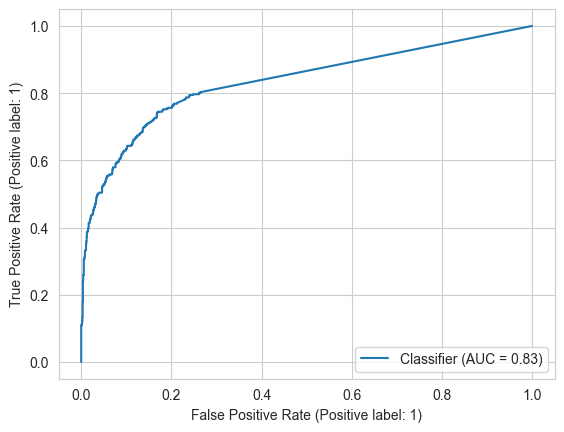

In [94]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [95]:
roc_auc_score(y_test, y_pred_proba)

0.8339104832918836

### Add Early Stop

#### Monitor the "val_loss" as metric

In [96]:
from tensorflow.python.keras.callbacks import EarlyStopping

In [97]:
model = Sequential()

model.add(Dense(10, activation="relu", input_dim= X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1))

opt = adam_v2.Adam(learning_rate=0.007)

model.compile(optimizer=opt, loss="binary_crossentropy")

In [98]:
model.weights

[<tf.Variable 'dense_16/kernel:0' shape=(10, 10) dtype=float32, numpy=
 array([[ 0.18683994,  0.26698875,  0.05275947, -0.4720282 , -0.4264598 ,
         -0.1182436 , -0.2124627 , -0.15417665, -0.5362261 ,  0.496966  ],
        [ 0.26439476,  0.28925854,  0.26518065,  0.20949042,  0.36116564,
          0.01926357,  0.06577325, -0.10295379,  0.18889129, -0.4588825 ],
        [-0.3906341 ,  0.07596654,  0.1745838 , -0.04788607, -0.41972515,
          0.24064863,  0.49048138,  0.53645706,  0.44496453, -0.11175433],
        [-0.00364405,  0.48274314, -0.22200444,  0.32295728,  0.39753187,
          0.00897837,  0.35591328,  0.42950612,  0.24836087,  0.12757134],
        [-0.09814885, -0.16251373, -0.06780991, -0.3853879 , -0.3269484 ,
          0.3761555 ,  0.08077097,  0.15464586,  0.2403974 ,  0.277256  ],
        [-0.38383168,  0.17631263, -0.49181584, -0.02591139,  0.45599127,
          0.48806918,  0.22416943, -0.04288524,  0.19600976,  0.06161642],
        [ 0.01528251, -0.13259372, 

In [99]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25, restore_best_weights=True)

In [100]:
model.fit(x=X_train, y=y_train, validation_split=0.10, batch_size=36, epochs=1000, callbacks=[early_stop])

Epoch 1/1000
200/200 [==============================] - 1s 3ms/step - loss: 0.4528 - val_loss: 0.3919
Epoch 2/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.4007 - val_loss: 0.3462
Epoch 3/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.3749 - val_loss: 0.3372
Epoch 4/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.4329 - val_loss: 0.3813
Epoch 5/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.4045 - val_loss: 0.3505
Epoch 6/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.3709 - val_loss: 0.3412
Epoch 7/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.3748 - val_loss: 0.3959
Epoch 8/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.3861 - val_loss: 0.3595
Epoch 9/1000
200/200 [==============================] - 0s 954us/step - loss: 0.3596 - val_loss: 0.3490
Epoch 10/1000
200/200 [==============================] - 0s 976us/step - loss: 0

<Axes: >

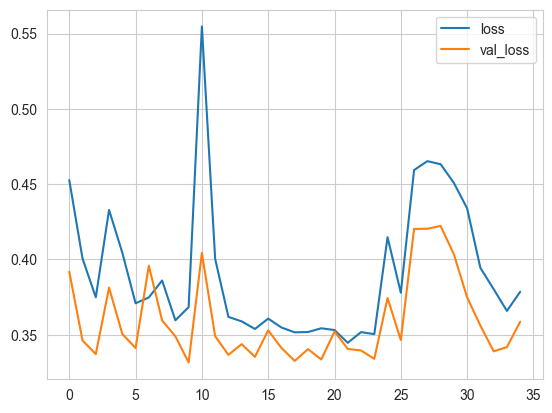

In [101]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [102]:
model.evaluate(X_test, y_test, verbose=0)

0.3375985026359558

In [103]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1532   45]
 [ 231  192]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1577
           1       0.81      0.45      0.58       423

    accuracy                           0.86      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



In [104]:
eval_metric(y_test, y_pred)

r2_score: 0.17250187761122893 
mae: 0.138 
mse: 0.138 
rmse: 0.3714835124201342


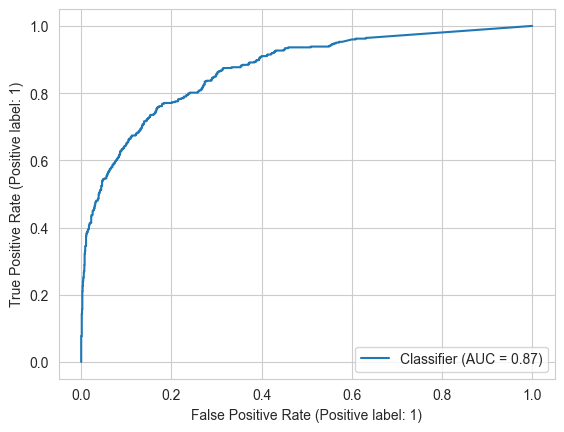

In [105]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [106]:
roc_auc_score(y_test, y_pred_proba)

0.870762632463411

#### Monitor the "val_recall" as metric

In [107]:
# Using the same model but changing only the monitor
early_stop = EarlyStopping(monitor="val_recall", mode="min", verbose=1, patience=25, restore_best_weights=True)

In [108]:
model.fit(x=X_train, y=y_train, validation_split=0.10, batch_size=36, epochs=1000, callbacks=[early_stop])

Epoch 1/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.3595 - val_loss: 0.3328
Epoch 2/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.3537 - val_loss: 0.3839
Epoch 3/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.3751 - val_loss: 0.3318
Epoch 4/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.3518 - val_loss: 0.3541
Epoch 5/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.3520 - val_loss: 0.3500
Epoch 6/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.3545 - val_loss: 0.3322
Epoch 7/1000
200/200 [==============================] - 0s 1ms/step - loss: 0.3548 - val_loss: 0.3424
Epoch 8/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.3653 - val_loss: 0.3788
Epoch 9/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.3773 - val_loss: 0.3365
Epoch 10/1000
200/200 [==============================] - 0s 2ms/step - loss: 0.357

<Axes: >

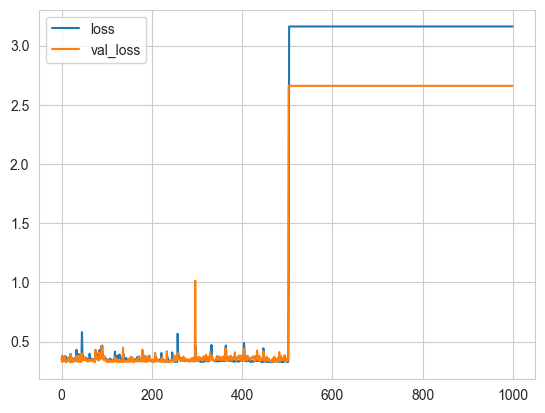

In [109]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [110]:
model.evaluate(X_test, y_test, verbose=0)

3.262376308441162

In [111]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1577    0]
 [ 423    0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1577
           1       0.00      0.00      0.00       423

    accuracy                           0.79      2000
   macro avg       0.39      0.50      0.44      2000
weighted avg       0.62      0.79      0.70      2000



In [112]:
eval_metric(y_test, y_pred)

r2_score: -0.26823081800887727 
mae: 0.2115 
mse: 0.2115 
rmse: 0.45989129150267677


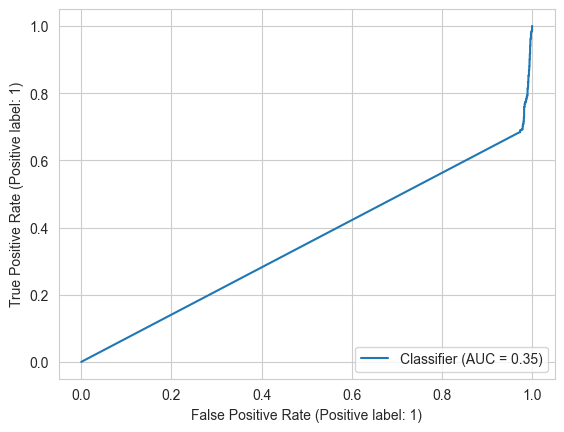

In [113]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [114]:
roc_auc_score(y_test, y_pred_proba)

0.3544825063598927

## Optuna

In [115]:
# Adam is already imported
from tensorflow.python.keras.optimizers import nadam_v2, adadelta_v2, rmsprop_v2
Nadam = nadam_v2.Nadam
Adadelta = adadelta_v2.Adadelta
RMSprop = rmsprop_v2.RMSprop
import optuna

In [117]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25, restore_best_weights=True)

In [119]:
trial_metric = "accuracy"
batch_size = 36


def create_model(trial):
    # Some hyperparameters we want to optimize
    first_hidden_layer = trial.suggest_int("input_layer_units", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(first_hidden_layer, input_dim=X_train.shape[1], activation="relu"))

    # you can add the hidden layers automatically, see the example below:
    hidden_layers = trial.suggest_int("hidden_layers", 2, 6)
    for i in range(hidden_layers):
      hidden_layer_units = "hidden_layer_units_" + str(i)
      hidden_layer_units = trial.suggest_int(hidden_layer_units, 8, 128)
      model.add(Dense(hidden_layer_units, activation="relu"))


    # we decided to use one neuron with sigmoid func in the output layer
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [120]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-30 21:56:08,180] A new study created in memory with name: no-name-44637da8-94cc-4a40-9e45-6ae73bd4835c
[I 2023-10-30 21:56:14,933] Trial 0 finished with value: 0.2460000067949295 and parameters: {'input_layer_units': 43, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 7.217113851779314e-05, 'hidden_layers': 2, 'hidden_layer_units_0': 8, 'hidden_layer_units_1': 36, 'w0': 0.049472190931059916, 'w1': 3.85307922580712}. Best is trial 0 with value: 0.2460000067949295.


Restoring model weights from the end of the best epoch.
Epoch 00026: early stopping


[I 2023-10-30 21:56:23,967] Trial 1 finished with value: 0.8575000166893005 and parameters: {'input_layer_units': 40, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.025781118150186397, 'hidden_layers': 2, 'hidden_layer_units_0': 125, 'hidden_layer_units_1': 118, 'w0': 1.3440187266781916, 'w1': 4.961169462083686}. Best is trial 1 with value: 0.8575000166893005.


Restoring model weights from the end of the best epoch.
Epoch 00036: early stopping


[I 2023-10-30 21:56:42,434] Trial 2 finished with value: 0.8450000286102295 and parameters: {'input_layer_units': 77, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.0018313588411510242, 'hidden_layers': 6, 'hidden_layer_units_0': 120, 'hidden_layer_units_1': 65, 'hidden_layer_units_2': 81, 'hidden_layer_units_3': 102, 'hidden_layer_units_4': 88, 'hidden_layer_units_5': 114, 'w0': 4.3378682382632885, 'w1': 0.3266835536711774}. Best is trial 1 with value: 0.8575000166893005.


Restoring model weights from the end of the best epoch.
Epoch 00051: early stopping


[I 2023-10-30 21:56:50,072] Trial 3 finished with value: 0.7885000109672546 and parameters: {'input_layer_units': 74, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'learning_rate': 1.9439091559289225e-05, 'hidden_layers': 3, 'hidden_layer_units_0': 17, 'hidden_layer_units_1': 46, 'hidden_layer_units_2': 96, 'w0': 0.433294605387897, 'w1': 0.020699881202863573}. Best is trial 1 with value: 0.8575000166893005.


Restoring model weights from the end of the best epoch.
Epoch 00030: early stopping


[I 2023-10-30 21:56:57,478] Trial 4 finished with value: 0.784500002861023 and parameters: {'input_layer_units': 117, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.0009457723987695943, 'hidden_layers': 3, 'hidden_layer_units_0': 54, 'hidden_layer_units_1': 103, 'hidden_layer_units_2': 119, 'w0': 0.14647326594802995, 'w1': 0.5824522847962985}. Best is trial 1 with value: 0.8575000166893005.


Restoring model weights from the end of the best epoch.
Epoch 00026: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00064: early stopping


[I 2023-10-30 21:57:12,814] Trial 5 finished with value: 0.8414999842643738 and parameters: {'input_layer_units': 70, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'learning_rate': 0.00553739660821341, 'hidden_layers': 5, 'hidden_layer_units_0': 87, 'hidden_layer_units_1': 29, 'hidden_layer_units_2': 92, 'hidden_layer_units_3': 46, 'hidden_layer_units_4': 65, 'w0': 0.47281747553790193, 'w1': 0.06271225800879562}. Best is trial 1 with value: 0.8575000166893005.
[I 2023-10-30 21:57:23,877] Trial 6 finished with value: 0.8715000152587891 and parameters: {'input_layer_units': 118, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.0008282302605453501, 'hidden_layers': 5, 'hidden_layer_units_0': 32, 'hidden_layer_units_1': 72, 'hidden_layer_units_2': 92, 'hidden_layer_units_3': 47, 'hidden_layer_units_4': 37, 'w0': 1.3771070632793523, 'w1': 1.6717747880629685}. Best is trial 6 with value: 0.8715000152587891.


Restoring model weights from the end of the best epoch.
Epoch 00031: early stopping


[I 2023-10-30 21:57:38,028] Trial 7 finished with value: 0.847000002861023 and parameters: {'input_layer_units': 123, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'learning_rate': 0.00034162327353172536, 'hidden_layers': 5, 'hidden_layer_units_0': 45, 'hidden_layer_units_1': 71, 'hidden_layer_units_2': 56, 'hidden_layer_units_3': 116, 'hidden_layer_units_4': 40, 'w0': 0.185014623256328, 'w1': 0.5662067805755615}. Best is trial 6 with value: 0.8715000152587891.


Restoring model weights from the end of the best epoch.
Epoch 00048: early stopping


[I 2023-10-30 21:57:48,218] Trial 8 finished with value: 0.8569999933242798 and parameters: {'input_layer_units': 94, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'learning_rate': 0.0003864628171360007, 'hidden_layers': 3, 'hidden_layer_units_0': 45, 'hidden_layer_units_1': 31, 'hidden_layer_units_2': 75, 'w0': 0.020162358261824137, 'w1': 0.03845504319249625}. Best is trial 6 with value: 0.8715000152587891.


Restoring model weights from the end of the best epoch.
Epoch 00050: early stopping


[I 2023-10-30 21:57:58,852] Trial 9 finished with value: 0.21150000393390656 and parameters: {'input_layer_units': 115, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.03860601406832723, 'hidden_layers': 3, 'hidden_layer_units_0': 60, 'hidden_layer_units_1': 110, 'hidden_layer_units_2': 75, 'w0': 0.014532093151345545, 'w1': 3.712402077783322}. Best is trial 6 with value: 0.8715000152587891.


Restoring model weights from the end of the best epoch.
Epoch 00036: early stopping


{'input_layer_units': 118,
 'optimizer': tensorflow.python.keras.optimizer_v2.nadam.Nadam,
 'learning_rate': 0.0008282302605453501,
 'hidden_layers': 5,
 'hidden_layer_units_0': 32,
 'hidden_layer_units_1': 72,
 'hidden_layer_units_2': 92,
 'hidden_layer_units_3': 47,
 'hidden_layer_units_4': 37,
 'w0': 1.3771070632793523,
 'w1': 1.6717747880629685}

In [133]:
# build model with optuna parameters
input_layer_units, hidden_layers, optimizer, lr, w0, w1 = (
    study.best_params["input_layer_units"],
    study.best_params["hidden_layers"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

# modify the hidden layers' neuron numbers according to the output of the previous code block
hidden_layer_units_1, hidden_layer_units_2, hidden_layer_units_3, hidden_layer_units_4 = (
    study.best_params["hidden_layer_units_0"],
    study.best_params["hidden_layer_units_1"],
    study.best_params["hidden_layer_units_2"],
    study.best_params["hidden_layer_units_3"],
    #study.best_params["hidden_layer_units_4"]
)

hidden_layer_units = [
             hidden_layer_units_1,
             hidden_layer_units_2,
             hidden_layer_units_3,
             hidden_layer_units_4,
             #hidden_layer_units_5,
             ]

tf.random.set_seed(42)
# instantiate the model
model = Sequential()
model.add(Dense(input_layer_units, activation="relu"))

for i in range(hidden_layers-1):
  model.add(Dense(hidden_layer_units[i], activation="relu"))

model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=36,
    epochs=100,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100
200/200 [==============================] - 9s 10ms/step - loss: 0.4602 - recall: 0.1551 - val_loss: 0.3652 - val_recall: 0.3116
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3817 - recall: 0.4072 - val_loss: 0.3346 - val_recall: 0.3986
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3551 - recall: 0.4485 - val_loss: 0.3266 - val_recall: 0.4058
Epoch 4/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3462 - recall: 0.4600 - val_loss: 0.3326 - val_recall: 0.4783
Epoch 5/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3412 - recall: 0.4702 - val_loss: 0.3270 - val_recall: 0.3841
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3345 - recall: 0.4797 - val_loss: 0.3296 - val_recall: 0.3478
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3315 - recall: 0.4783 - val_loss: 0.3350 - val_recall: 0.4275
Epoch 8/100
200/200 [=====

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<Axes: >

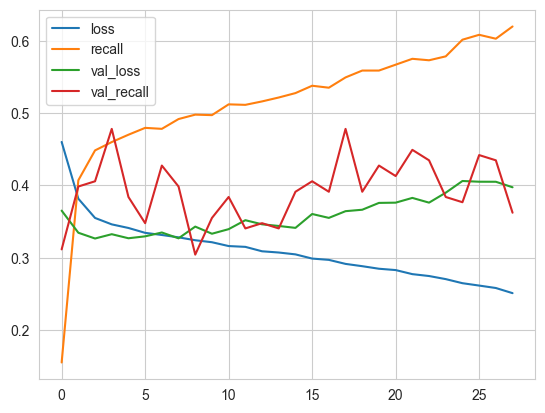

In [134]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [138]:
model.evaluate(X_test, y_test, verbose=0)

[0.33368000388145447, 0.513002336025238]

In [137]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1511   66]
 [ 206  217]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1577
           1       0.77      0.51      0.61       423

    accuracy                           0.86      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.86      0.85      2000



In [139]:
eval_metric(y_test, y_pred)

r2_score: 0.18449460402266038 
mae: 0.136 
mse: 0.136 
rmse: 0.3687817782917155


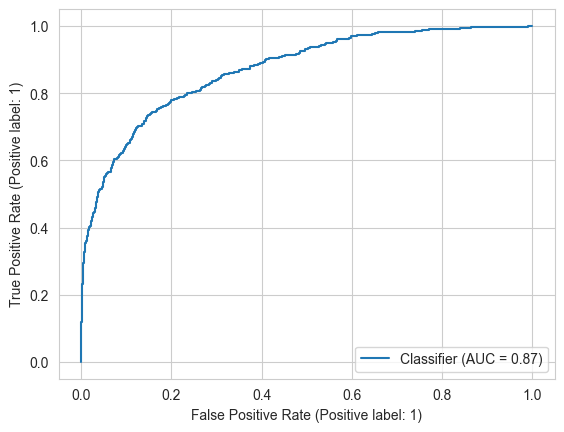

In [135]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [136]:
roc_auc_score(y_test, y_pred_proba)

0.8714484665050646

# Final Model and Model Deployment

In [151]:
import pickle

pickle.dump(scaler, open("scaler_churn", "wb"))

In [155]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(10, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1))

opt = Adam(learning_rate=0.004)

model.compile(optimizer=opt, loss="binary_crossentropy")

model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=36, epochs=500, verbose=1) 

Epoch 1/500
223/223 [==============================] - 2s 6ms/step - loss: 0.5479 - val_loss: 0.4263
Epoch 2/500
223/223 [==============================] - 1s 5ms/step - loss: 0.4270 - val_loss: 0.4141
Epoch 3/500
223/223 [==============================] - 1s 5ms/step - loss: 0.4156 - val_loss: 0.3998
Epoch 4/500
223/223 [==============================] - 1s 5ms/step - loss: 0.4029 - val_loss: 0.3900
Epoch 5/500
223/223 [==============================] - 1s 5ms/step - loss: 0.4017 - val_loss: 0.4023
Epoch 6/500
223/223 [==============================] - 1s 5ms/step - loss: 0.4055 - val_loss: 0.4025
Epoch 7/500
223/223 [==============================] - 1s 5ms/step - loss: 0.4003 - val_loss: 0.4092
Epoch 8/500
223/223 [==============================] - 1s 5ms/step - loss: 0.3966 - val_loss: 0.4074
Epoch 9/500
223/223 [==============================] - 1s 4ms/step - loss: 0.4167 - val_loss: 0.4365
Epoch 10/500
223/223 [==============================] - 1s 5ms/step - loss: 0.4022 - val_lo

<Axes: >

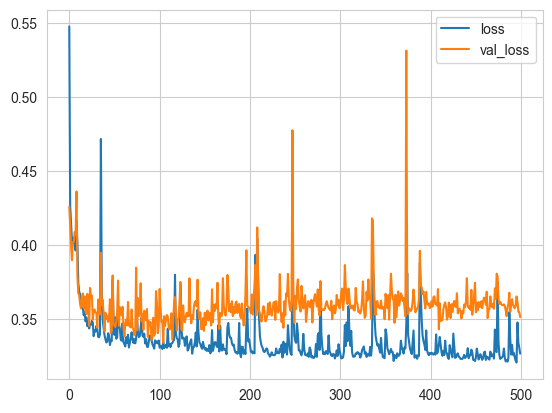

In [156]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [157]:
model.evaluate(X_test, y_test, verbose=0)

0.35162562131881714

In [158]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1539   38]
 [ 240  183]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1577
           1       0.83      0.43      0.57       423

    accuracy                           0.86      2000
   macro avg       0.85      0.70      0.74      2000
weighted avg       0.86      0.86      0.84      2000



In [159]:
model.save('model_churn.h5')

## Prediction

In [160]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

CreditScore           619.00
Geography               0.00
Gender                  1.00
Age                    42.00
Tenure                  2.00
Balance                 0.00
NumOfProducts           1.00
HasCrCard               1.00
IsActiveMember          1.00
EstimatedSalary    101348.88
Name: 0, dtype: float64

In [161]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 10))
single_customer

array([[-0.24626866,  0.        ,  1.        ,  0.41666667, -0.6       ,
        -0.76299685,  0.        ,  0.        ,  0.        ,  0.00636556]])

In [162]:
y_pred =model.predict(single_customer).astype("int32")
y_pred

array([[0]])

In [163]:
# sad model
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___